In [1]:
import numpy as np
from text_processing.process_data import ProcessData
from text_processing.dea import DataAnalysisExploration
import warnings

warnings.filterwarnings("ignore")


## Data Exploratory and Analysis

In [2]:
# Instantiate process data class
process_data = ProcessData()


### Initial dataset (before removing outliers)

In [3]:
# Initial dataset after preprocessing and adding a column for sentence length
initial_clean_data = process_data.initial_clean_data_with_count()
initial_clean_data.head()


,sentence,language,sentence_length
0,dili outubru gabinete apoiu atividade kónjuge...,tet,275
1,treinamentu ne’e ninia objetivu prinsipál mak ...,tet,232
2,iha loron daruak hosi treinamentu ne’e partisi...,tet,288
3,partisipante na’in iha treinamentu ne’e mai ho...,tet,82
4,komunidade iha suku bikeli ho makadade agrades...,tet,320


In [4]:
# Confirm that the input data is cleaned.
clean = initial_clean_data[
    (initial_clean_data["sentence"] == "") & (initial_clean_data["sentence"] == " ")
]
try:
    assert len(clean) == 0
    print("Data is cleaned.")
except AssertionError:
    print("Data is NOT cleaned.")


Data is cleaned.


In [5]:
# Initial dataset
dea = DataAnalysisExploration(initial_clean_data)


In [6]:
# Word summary
print("Before normalized: ")
dea.words_summary()


Before normalized: 


,language,max_words/sentence,min_words/sentence,avg_words/sentence,total_words_in_doc
0,tet,208,1,29.049387,526433
1,id,1632,0,15.880001,512400
2,en,214,1,18.394119,643040
3,pt,1091,1,20.289662,597632


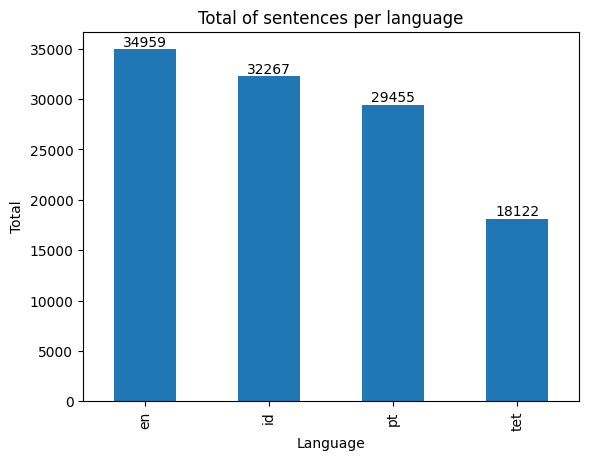

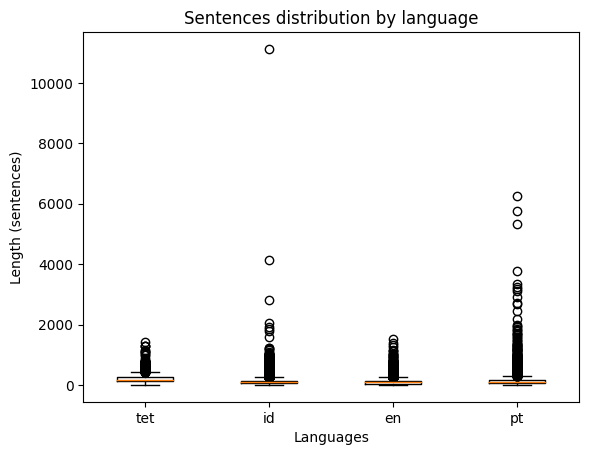

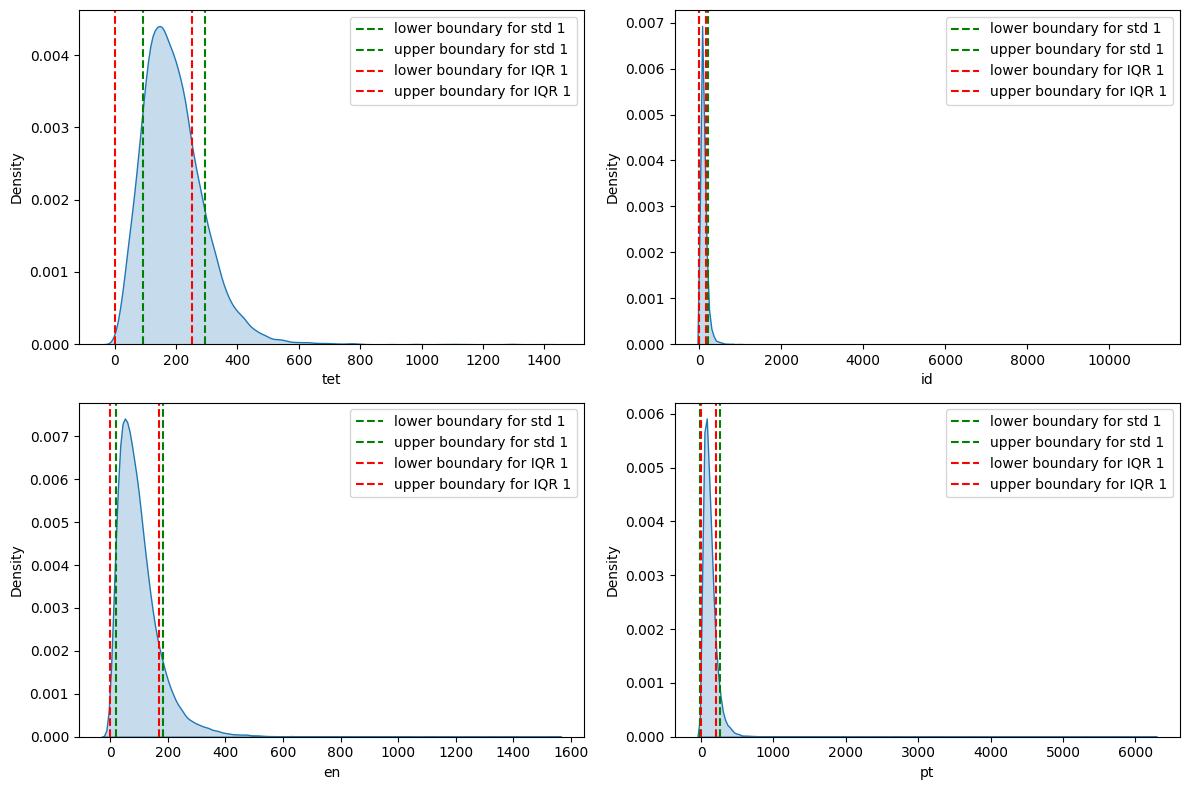

In [7]:
# Display total sentences per language and vizualise them in graphs.
dea.display_data_in_bar()
dea.display_data_in_boxplot()
dea.display_data_in_gaussian_dist(display_lines=True)


### Final dataset (after removing outliers)

In [3]:
# Final dataset
final_dataset = process_data.final_clean_data()
final_dataset.head()


,sentence,language,sentence_length
1,treinamentu ne’e ninia objetivu prinsipál mak ...,tet,232
3,partisipante na’in iha treinamentu ne’e mai ho...,tet,82
7,enkuantu jenerál manajer cefobom antoninho dou...,tet,159
10,iha fatin hanesan eis jornalista rádiu komunid...,tet,224
12,aléin hosi ne’e josé hatete katak atu halo ree...,tet,234


In [4]:
dea_final = DataAnalysisExploration(final_dataset)


In [10]:
# Words summary
print("After normalized: ")
dea_final.words_summary()


After normalized: 


,language,max_words/sentence,min_words/sentence,avg_words/sentence,total_words_in_doc
0,tet,44,2,22.123677,288360
1,id,44,1,13.837017,408787
2,en,51,1,16.371740,526728
3,pt,47,1,16.746642,435061


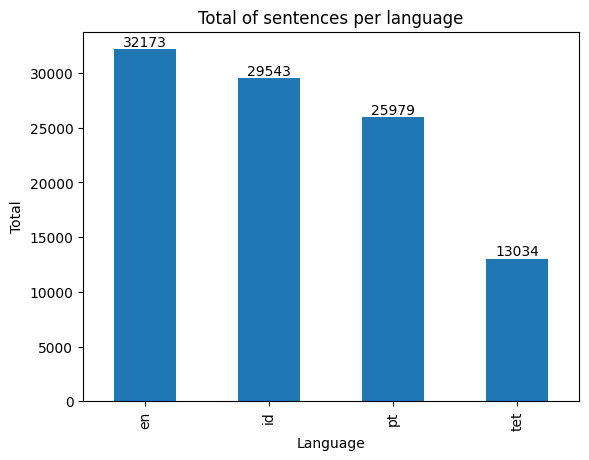

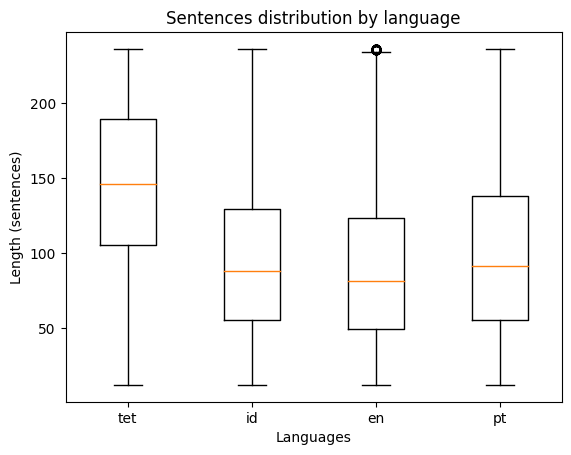

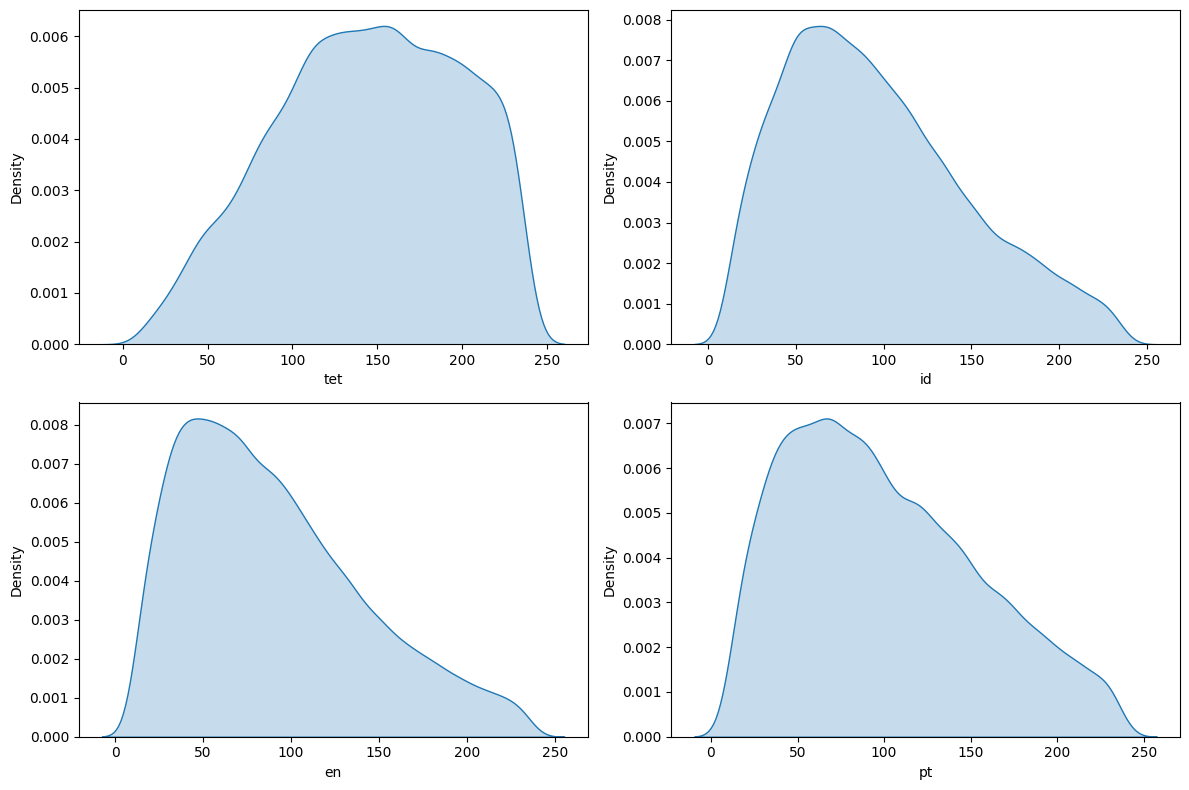

In [11]:
# Vizualize the final dataset
dea_final = DataAnalysisExploration(final_dataset)
dea_final.display_data_in_bar()
dea_final.display_data_in_boxplot()
dea_final.display_data_in_gaussian_dist(display_lines=False)


In [12]:
# Check whether the final_clean_data equals to total_data_after_removing_outliers
try:
    assert len(final_dataset) == len(process_data.removed_sentence_outliers())
    print("Test passed.")
except AssertionError:
    print("The total is different.")


Test passed.


## Clustering

In [5]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, Birch, AgglomerativeClustering


# Generate plot for each of the clustering algorithms
dea_final.display_data_in_clustering(KMeans, "K-Means", using_random_state=True)
dea_final.display_data_in_clustering(
    GaussianMixture, "Gaussian-Mixture", using_n_components=True, using_random_state=True
)
dea_final.display_data_in_clustering(AgglomerativeClustering, "Agglomerative")
dea_final.display_data_in_clustering(Birch, "Birch")


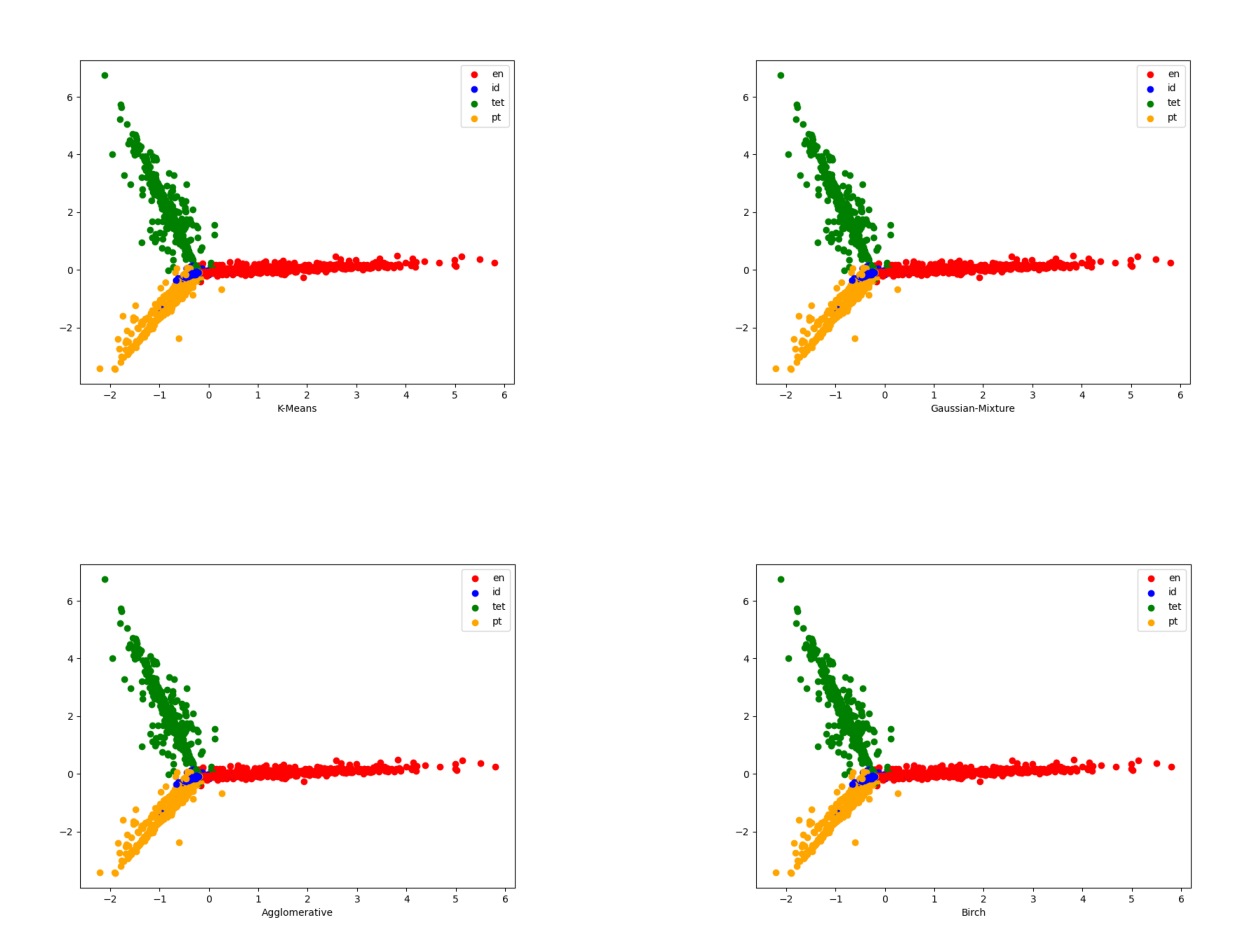

In [7]:
# Compile plots in an image
dea_final.display_images("k-means.png", "gaussian-mixture.png", "agglomerative.png", "birch.png")
